In [1]:
import pandas as pd

In [23]:
pd.read_csv('College.csv')

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [10]:
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

In [25]:
college2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

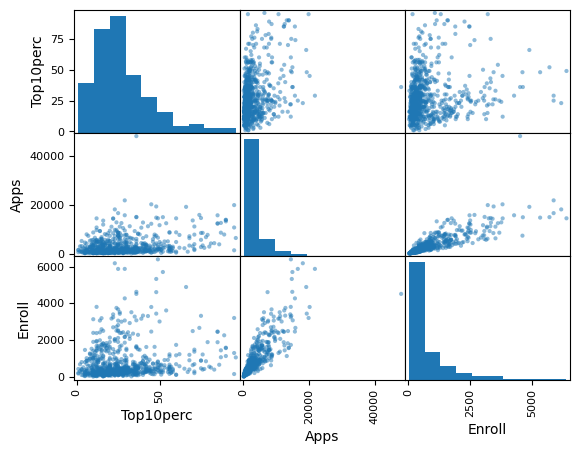

In [20]:
pd.plotting.scatter_matrix(college2[['Top10perc', 'Apps', 'Enroll']])

In [35]:
college2['Private'].replace('Yes', 1, inplace=True)
college2['Private'].replace('No', 0, inplace=True)

/tmp/ipykernel_21509/2392616655.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  college2['Private'].replace('No', 0, inplace=True)


<Axes: >

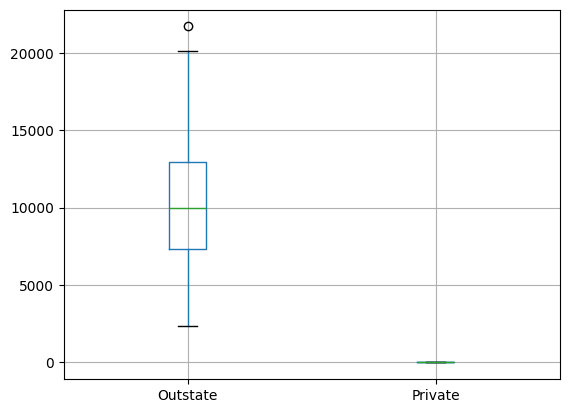

In [39]:
college2.boxplot(['Outstate', 'Private'])

In [48]:
college = college2
college['Elite'] = pd.cut(college['Top10perc'], [0, 50, 100], labels=['No', 'Yes'])

In [51]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

In [55]:
college['Elite'].replace('Yes', 1, inplace=True)
college['Elite'].replace('No', 0, inplace=True)
college.boxplot(['Outstate', 'Elite'])

In [63]:
college['Elite'] = college['Elite'].astype('int64')

<Axes: >

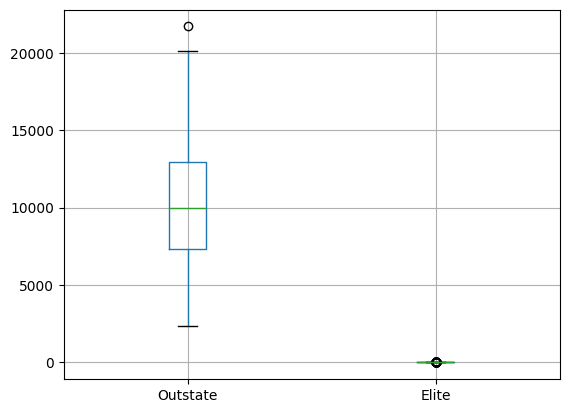

In [66]:
college.boxplot(['Outstate', 'Elite'])

<Axes: ylabel='Frequency'>

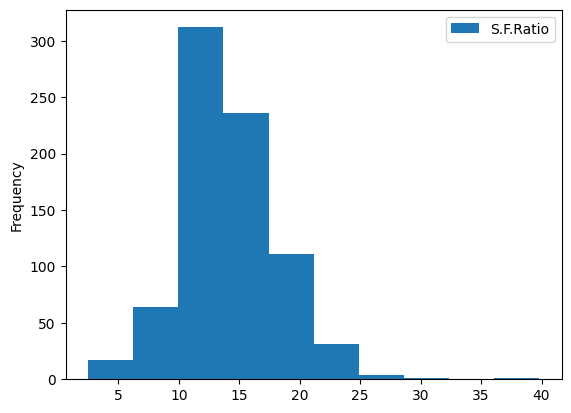

In [95]:
plt = college[['S.F.Ratio']].plot.hist(bins=10)
plt